# Preventics artificial multi-year data exploration for BT-100

In this notebook we have the basic information wrt what data will be available within the Preventics system after more than 1 year of operation. The data is generated artificially and is not real. The purpose of this notebook is to provide a basic understanding of the data that will be available for the BT-100 implementation.

> IMPORTANT: while the data is not real, the structure, patterns, and the types of data are with the caveat that there is no correlation between the various time-series as it actually happends in reality (ie we can have no increase in people count for a certain location yet for the people presence we have a timeseries that shows different situation). As-is the data is totally sufficient for the fully development and deployment of the reporting system based on Tableau.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
fn = "C:/Dropbox/DATA/__DATASETS/two_years_full_data_for_tableau.parquet"
df = pd.read_parquet(fn)

In [46]:
df

,DATETIME,FUNCTIONALITY,LOCATION,ZONE,VALUE,IS_ALERT
0,2024-08-01 08:00:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
1,2024-08-01 08:01:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
2,2024-08-01 08:02:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
3,2024-08-01 08:03:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
4,2024-08-01 08:04:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
...,...,...,...,...,...,...
203223900,2026-07-02 17:00:40,MULTIZONE_PEOPLE_PRESENCE_CROWDED_01,sucursala-vaslui,ZONA-2,9,1
203223901,2026-07-02 17:05:15,MULTIZONE_PEOPLE_PRESENCE_CROWDED_01,sucursala-vaslui,ZONA-2,11,1
203223902,2026-07-02 17:25:08,MULTIZONE_PEOPLE_PRESENCE_CROWDED_01,sucursala-vaslui,ZONA-2,10,1
203223903,2026-07-02 17:30:22,MULTIZONE_PEOPLE_PRESENCE_CROWDED_01,sucursala-vaslui,ZONA-2,9,1


In [47]:
df.describe()

,DATETIME,VALUE,IS_ALERT
count,203223905,2.032239e+08,2.032239e+08
mean,2025-07-17 22:14:56.863454976,4.194814e+01,9.470942e-02
min,2024-08-01 00:00:00,0.000000e+00,0.000000e+00
25%,2025-01-23 10:30:01,3.000000e+00,0.000000e+00
50%,2025-07-17 13:10:00,9.000000e+00,0.000000e+00
75%,2026-01-08 15:45:28,4.300000e+01,0.000000e+00
max,2026-07-02 23:55:52,6.310000e+02,1.000000e+00
std,NaN,9.213387e+01,2.928132e-01


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203223905 entries, 0 to 203223904
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   DATETIME       datetime64[ns]
 1   FUNCTIONALITY  category      
 2   LOCATION       category      
 3   ZONE           category      
 4   VALUE          int32         
 5   IS_ALERT       int8          
dtypes: category(3), datetime64[ns](1), int32(1), int8(1)
memory usage: 3.0 GB


In [49]:
df.FUNCTIONALITY.unique()

['MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01', 'PEOPLE_COUNTING_02', 'ATM_PERSON_TIME_01', 'MULTIZONE_PEOPLE_PRESENCE_CROWDED_01']
Categories (4, object): ['ATM_PERSON_TIME_01', 'MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01', 'MULTIZONE_PEOPLE_PRESENCE_CROWDED_01', 'PEOPLE_COUNTING_02']

In [50]:
df[df.FUNCTIONALITY == "ATM_PERSON_TIME_01"]

,DATETIME,FUNCTIONALITY,LOCATION,ZONE,VALUE,IS_ALERT
1806606,2024-08-01 01:00:40,ATM_PERSON_TIME_01,agentia-andrei-muresanu,ATM-1,502,1
1806607,2024-08-01 02:00:29,ATM_PERSON_TIME_01,agentia-andrei-muresanu,ATM-1,373,1
1806608,2024-08-01 02:45:27,ATM_PERSON_TIME_01,agentia-andrei-muresanu,ATM-1,479,1
1806609,2024-08-01 04:15:11,ATM_PERSON_TIME_01,agentia-andrei-muresanu,ATM-1,528,1
1806610,2024-08-01 04:45:15,ATM_PERSON_TIME_01,agentia-andrei-muresanu,ATM-1,430,1
...,...,...,...,...,...,...
203130374,2026-07-02 15:30:51,ATM_PERSON_TIME_01,sucursala-vaslui,ATM-4,111,0
203130375,2026-07-02 17:00:53,ATM_PERSON_TIME_01,sucursala-vaslui,ATM-4,336,1
203130376,2026-07-02 17:45:49,ATM_PERSON_TIME_01,sucursala-vaslui,ATM-4,126,0
203130377,2026-07-02 20:00:38,ATM_PERSON_TIME_01,sucursala-vaslui,ATM-4,443,1


In [51]:
def explore_data(df, location, functionality, zone, date):
  zero_hour = pd.to_datetime(date)
  last_hour = pd.to_datetime(date) + pd.Timedelta("1 day")
  df_slice = df[
    (df.FUNCTIONALITY == functionality) & 
    (df.DATETIME > zero_hour) & 
    (df.DATETIME < last_hour) &
    (df.LOCATION == location) &
    (df.ZONE == zone)
  ]
  ax = df_slice.plot(
    kind="line", x="DATETIME", y="VALUE", 
    title="{} plot for {}".format(functionality, date), 
    xlabel="Time", ylabel="Value"
  )
  df_hourly = df_slice.groupby(df_slice.DATETIME.dt.hour).agg({"VALUE": "mean"})
  df_hourly.plot(
    kind="line", y="VALUE", 
    title="{} plot for {}".format(functionality, date), 
    xlabel="Hour", ylabel="Value"
  )
  return df_slice, (zero_hour, last_hour)

Data from 2025-01-01 00:00:00 up to 2025-01-02 00:00:00


,DATETIME,FUNCTIONALITY,LOCATION,ZONE,VALUE,IS_ALERT
196527,2025-01-01 08:00:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
196528,2025-01-01 08:01:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
196529,2025-01-01 08:02:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
196530,2025-01-01 08:03:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
196531,2025-01-01 08:04:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
...,...,...,...,...,...,...
197123,2025-01-01 17:56:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
197124,2025-01-01 17:57:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
197125,2025-01-01 17:58:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
197126,2025-01-01 17:59:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0


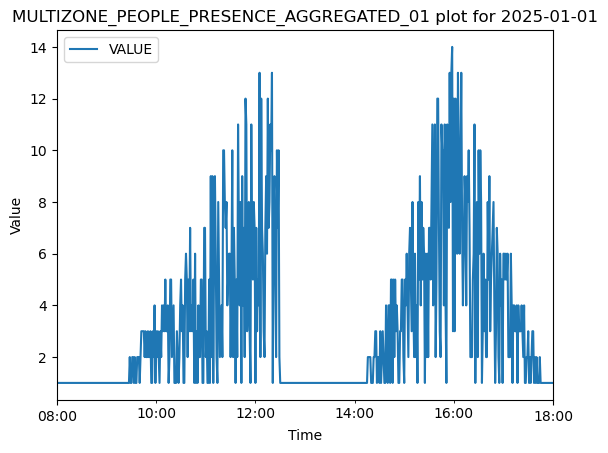

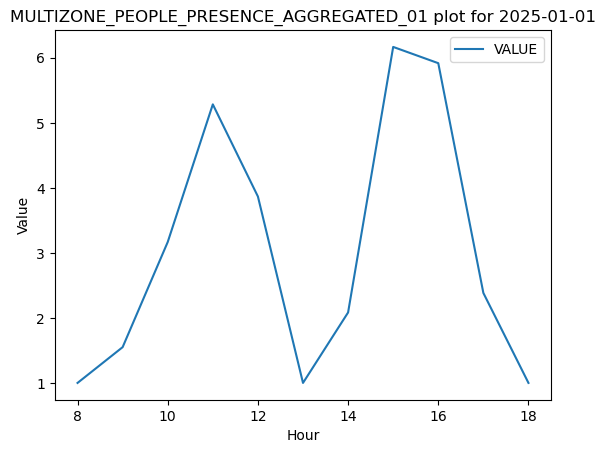

In [52]:
df1, (start1, end1) = explore_data(
  df=df, 
  location='agentia-andrei-muresanu',
  functionality="MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01", 
  zone='CASE',
  date="2025-01-01"
)
print(f"Data from {start1} up to {end1}")
df1

Data from 2025-09-05 00:00:00 up to 2025-09-06 00:00:00


,DATETIME,FUNCTIONALITY,LOCATION,ZONE,VALUE,IS_ALERT
101005620,2025-09-05 08:00:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,0,0
101005621,2025-09-05 08:01:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,0,0
101005622,2025-09-05 08:02:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,0,0
101005623,2025-09-05 08:03:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,0,0
101005624,2025-09-05 08:04:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,0,0
...,...,...,...,...,...,...
101006216,2025-09-05 17:56:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,82,0
101006217,2025-09-05 17:57:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,82,0
101006218,2025-09-05 17:58:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,82,0
101006219,2025-09-05 17:59:00,PEOPLE_COUNTING_02,agentia-sebes,INTRARE-1,82,0


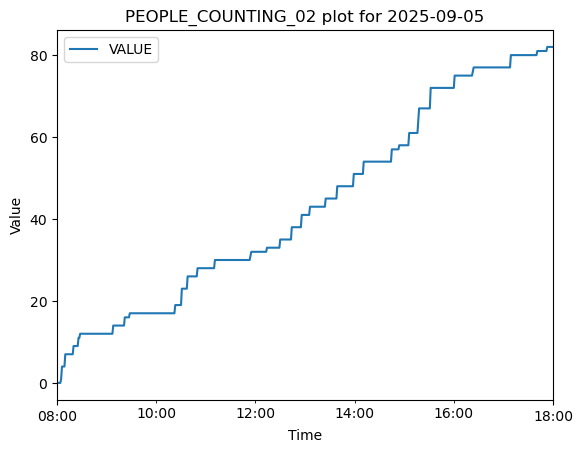

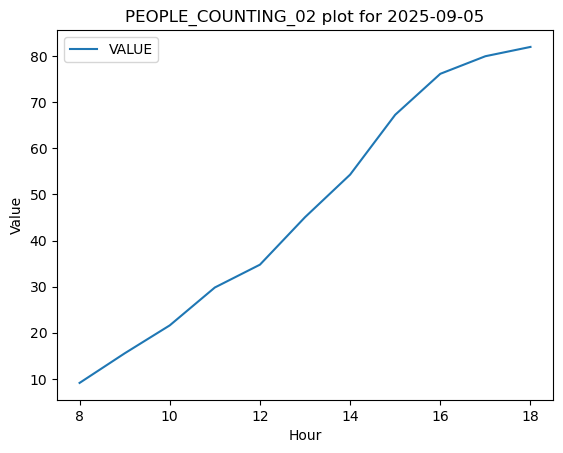

In [53]:
df2, (start2, end2) = explore_data(
  df=df, 
  functionality="PEOPLE_COUNTING_02", 
  location='agentia-sebes',
  zone='INTRARE-1',
  date="2025-09-05",
)
print(f"Data from {start2} up to {end2}")
df2

In [1]:
import cx_Oracle

In [2]:
username = 'prev_user'
password = 'Hyfy1234'
dsn = '172.31.255.153/XEPDB1'  # Adjust as necessary
port = 1521
encoding = 'UTF-8'

In [3]:
cx_Oracle.init_oracle_client(lib_dir=r"C:/instantclient_21_13")
connection = cx_Oracle.connect(username, password, dsn, encoding=encoding)
cursor = connection.cursor()
connection


<cx_Oracle.Connection to prev_user@172.31.255.153/XEPDB1>

In [9]:
select_stmt = """
SELECT * FROM prev_user.history
"""
cursor.execute(select_stmt)
rows = cursor.fetchall()
cursor.description

[('DATETIME', <cx_Oracle.DbType DB_TYPE_TIMESTAMP>, 23, None, 0, 6, 1),
 ('FUNCTIONALITY',
  <cx_Oracle.DbType DB_TYPE_VARCHAR>,
  255,
  255,
  None,
  None,
  1),
 ('LOCATION', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 255, 255, None, None, 1),
 ('ZONE', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 255, 255, None, None, 1),
 ('VALUE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 11, None, 10, 0, 1),
 ('IS_ALERT', <cx_Oracle.DbType DB_TYPE_NUMBER>, 4, None, 3, 0, 1)]

In [12]:
df_ora = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])
df_ora

,DATETIME,FUNCTIONALITY,LOCATION,ZONE,VALUE,IS_ALERT
0,2024-08-01 08:00:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
1,2024-08-01 08:01:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
2,2024-08-01 08:02:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
3,2024-08-01 08:03:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
4,2024-08-01 08:04:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
...,...,...,...,...,...,...
95,2024-08-01 09:35:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0
96,2024-08-01 09:36:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,2,0
97,2024-08-01 09:37:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,2,0
98,2024-08-01 09:38:00,MULTIZONE_PEOPLE_PRESENCE_AGGREGATED_01,agentia-andrei-muresanu,CASE,1,0


In [1]:
BRANCHES = [
    'agentia-andrei-muresanu', 'agentia-focsani-nord', 'agentia-soseaua-chitilei', 'agentia-intim',
    'agentia-bals', 'agentia-pipera', 'agentia-dragasani', 'punct-de-lucru-mall-atrium',
    'agentia-iulius-mall', 'agentia-campia-turzii-pta-m-viteazu', 'agentia-sighet-2', 'agentia-republicii',
    'agentia-falticeni', 'agentia-giurgiu', 'agentia-rogerius', 'agentia-mosilor',
    'agentia-capitol', 'agentia-sasar', 'agentia-iosefin', 'agentia-buna-ziua',
    'agentia-memorandumului', 'agentia-tudor', 'agentia-mihai-bravu', 'agentia-universitate',
    'agentia-piata-romana', 'agentia-baneasa-mall', 'agentia-electroputere-craiova', 'punct-de-lucru-gold-plaza',
    'agentia-alba-mall', 'punct-de-lucru-mall-aurora', 'agentia-vivo-mall', 'punct-de-lucru-iulius-mall',
    'agentia-militari-shopping-mall', 'agentia-mega-mall', 'agentia-park-lake-mall', 'agentia-lotus',
    'agentia-brasov-coresi-mall', 'agentia-musat-value-center-mall', 'agentia-shopping-city-mall', 'agentia-promenada-mall',
    'agentia-sun-plaza', 'agentia-bucuresti-plaza-mall', 'agentia-roman', 'agentia-lugoj',
    'agentia-apusului', 'agentia-ramnicu-sarat', 'agentia-cimpeni', 'agentia-motilor',
    'agentia-medias', 'agentia-sebes', 'agentia-cetate', 'agentia-alesd',
    'agentia-dorohoi', 'agentia-nehoiu', 'agentia-piata-marasti', 'agentia-brazda-lui-novac',
    'agentia-tecuci', 'agentia-targu-neamt', 'agentia-ampoi', 'agentia-salonta',
    'agentia-craiova-est', 'agentia-valea-rosie', 'agentia-gheorgheni', 'agentia-hateg',
    'agentia-orastie', 'sucursala-drobeta-turnu-severin', 'sucursala-alba-iulia', 'sucursala-oradea',
    'sucursala-satu-mare', 'sucursala-craiova', 'sucursala-piatra-neamt', 'sucursala-baia-mare',
    'sucursala-tg-jiu', 'sucursala-deva', 'sucursala-timisoara', 'sucursala-focsani',
    'sucursala-arad', 'sucursala-botosani', 'sucursala-cluj', 'sucursala-sf-gheorghe',
    'sucursala-mures', 'sucursala-pitesti', 'sucursala-buzau', 'sucursala-zalau',
    'sucursala-bucuresti-nord', 'sucursala-bacau', 'sucursala-miercurea-ciuc', 'sucursala-tulcea',
    'sucursala-bucuresti-vest', 'sucursala-bistrita', 'sucursala-braila', 'sucursala-bucuresti-est',
    'sucursala-targoviste', 'sucursala-slatina', 'sucursala-resita', 'agentia-millennium',
    'agentia-campina', 'agentia-onesti', 'agentia-gara-iasului', 'sucursala-vaslui'
]

max([len(branch) for branch in BRANCHES])

35

In [2]:
15+35+10+15+10

85

In [3]:
100*200_000_000 / 1024**3

18.62645149230957